In [0]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
diabetes.shape

(768, 9)

In [0]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [0]:
# aplicando la metrica de matriz de confusion, ytest vs ypred
# genera arregla de dos dimensiones
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

Text(0.5, 257.44, 'Etiqueta de prediccion')

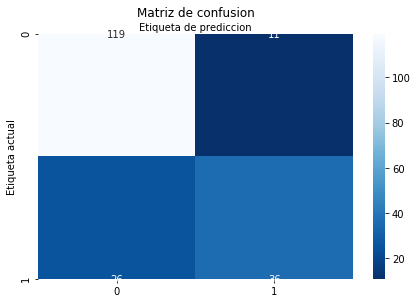

In [18]:
import numpy as np
class_names = [0, 1] # 0 no diabetes y 1 diabetes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names) # para mostrar informacion de 0 y 1 en x
plt.yticks(tick_marks, class_names) # para mostrar informacion de 0 y 1 en y

# Mmostramos matriz a traves de un heatmap cmap azules
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
# label en la parte superior
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1) # y posicion en queremos
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

De la grafica de la matriz de confusion se lee regularmente de forma diagonal, decimos que en el primer cuadro 119 son la cantidad de ejemplos clasificados correctamente, luego vamos a 36 que son ejemplos clasificados correctamente cuando es un negativo (que no tiene diabetes), luego vamos al 11 que son aquellos clasificados incorrectamente, y los 26 que son aquellos clasificados incorrectamente como positivos

In [0]:
# calculamos la metric a de exactitud del modelo comparando el y test y y predict
print('Exactitud ', metrics.accuracy_score(Y_test, y_pred))

Exactitud  0.8072916666666666
